# Light distribution

- In this example we have a $5 \times 5 \times 0.6$ cm$^2$ monolithic scintillators of LaBr$_3$, encapsulated in a mechanical frame and covered on three of its faces with a light scattering coating ang glued to a glass on its fourth face (one of the $5 \times 5$ cm$^2$ face). A $16 \times 16$ photodetector array consisting of $6 \times 6$mm^2 SiPM is mounted on the glass to collect the scintillation light induced by a $^{57}$Co point source set above the center of the scintillator. It emits 122 keV $\gamma$-rays only along the z-axis, toards the scintillator. For each scintillation event, the light is collected in the the 256 channels which a photodetection efficiency of 40%.
- The goal here is to study the light distribution for each scintillation event, collected in the photdetector array, which is at $z=0$ a binomial random distribution will be applied on each pixel to represent the photodetection efficiency. You can display a couple of distributions as well as its mean on all the events. You can run the Gate simulation or use the given *CamPos_0.hits.npy* file.
- Do the same study, moving the source position in another position.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hits = np.load('CamPos_0.hits.npy')
print(hits)
print(hits.dtype)

[(22,    1, 0, 1.08969377e-10, 0.01      , 0,  0, 0, 1,   0.       ,  0.       , 7.331803 ,   0.       ,  0.       ,  1.8318027,  0.95513076, -0.2445309 , -0.16712227, 2.0235635e-02,  1.1681973, 32.668198, 0., 4.5, b'Compton', b'NULL', b'NULL', 0, 0, 1, -1, -1, -1, -1, -1, -1, -1, 0., 0., 40., 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1)
 ( 0, 1280, 1, 1.18202418e-10, 0.01000002, 0,  0, 0, 1, -13.8955   , -4.8452215, 0.       , -13.8955   , -4.8452215, -1.25     , -0.6637499 , -0.40950292, -0.6258941 , 3.2630001e-06,  3.9942856, 18.650629, 0., 4.5, b'Transportation', b'NULL', b'NULL', 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0., 0., 40., 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1)
 ( 0, 1279, 1, 9.68753013e-11, 0.01000001, 0,  0, 0, 1, -11.208544 ,  7.366158 , 0.       , -11.208544 ,  7.366158 , -1.25     , -0.73327863,  0.48190436, -0.4796568 , 3.2630001e-06,  5.21206  , 15.285519, 0., 4.5, b'Transportation', b'NULL', b'NULL', 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0., 0., 40., 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1)
 .

In [3]:
eid = np.unique(hits["eventID"])
cond = np.abs(hits['edep'] - 0.122) < 0.001
print(cond.sum(), len(eid))
g_eid = hits["eventID"][cond]

71 87


In [4]:
frames = np.zeros((len(eid), 16, 16))
frames_pde = np.zeros((len(eid), 16, 16))
cond_opt = hits["PDGEncoding"] == 0
for i in range(len(g_eid)):
    cond_evt = hits["eventID"] == g_eid[i]
    opt_hits = hits[cond_evt & cond_opt]
    x_pos = opt_hits["posX"]
    y_pos = opt_hits["posY"]
    z_pos = opt_hits["posZ"]
    cond_z0 = z_pos == 0
    frames[i], x, y = np.histogram2d(x_pos[cond_z0], y_pos[cond_z0], bins=16, range=((-25, 25), (-25, 25)))
    frames_pde[i] = np.random.binomial(frames[0].astype(int), 0.4)

In [5]:
print(frames.sum())

416632.0


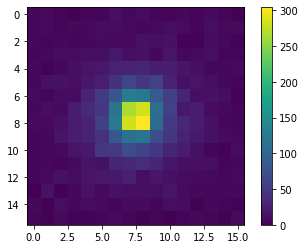

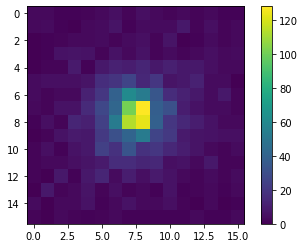

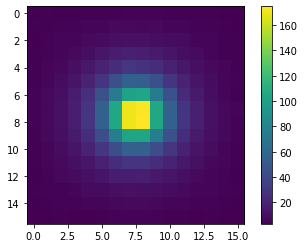

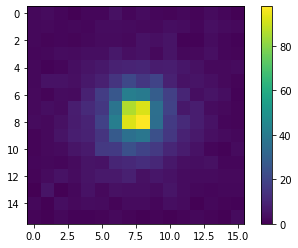

In [6]:
plt.figure()
plt.imshow(frames[0])
plt.colorbar()

plt.figure()
plt.imshow(frames_pde[0])
plt.colorbar()

plt.figure()
plt.imshow(frames.mean(axis=0))
plt.colorbar()

plt.figure()
plt.imshow(frames_pde.mean(axis=0))
plt.colorbar()

plt.show()